In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import doctest
import copy

In [ ]:
#https://stackoverflow.com/questions/40137950/possible-to-run-python-doctest-on-a-jupyter-cell-function
def test(func):
    '''
    Use test as a decorator to a function with doctests in Jupyter notebook. 
    Run the cell to see the results of the doctests.
    '''
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

### Simulate straight line and circular movements with Unicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$

Use the Kinematics equations we had developed in class for the Unicycle model

In [ ]:
@test 
def unicycle_model(curr_pose, v, w, dt=1.0):
    '''
    >>> unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
    (1.0, 0.0, 0.0)
    >>> unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
    (0.0, 0.0, 1.0)
    >>> unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
    (1.0, 0.0, 1.0)
    '''
    ## write code to calculate next_pose
    # refer to the kinematic equations of a unicycle model
    x, y, theta = curr_pose
    
    x += v*np.cos(theta)*dt
    y += v*np.sin(theta)*dt
    theta += w*dt
 
   

    
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))

    # return calculated (x, y, theta)
    return x, y, theta

Finding tests in unicycle_model
Trying:
    unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
Expecting:
    (1.0, 0.0, 0.0)
ok
Trying:
    unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
Expecting:
    (0.0, 0.0, 1.0)
ok
Trying:
    unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
Expecting:
    (1.0, 0.0, 1.0)
ok


Now let us try to simulate motion along a straight line and circle

Look at the kinematics equations you wrote - what should $v,\omega$ if
+ There is no change in $\theta$
+ $\theta$ has to change from 0 to 360 degrees

In [ ]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
straight_trajectory.append(pose)
steps = 10
#fill in v and omega values
all_v = np.ones(steps)
all_w = np.zeros(steps)
for v, w in zip(all_v, all_w):
   #instruction to take v, w and compute new pose   
   pose=unicycle_model(pose,v,w)
   # store pose
   straight_trajectory.append(pose) 
straight_trajectory=np.array(straight_trajectory)
print(straight_trajectory)

   
    

[[0.00000000e+00 0.00000000e+00 1.57079633e+00]
 [6.12323400e-17 1.00000000e+00 1.57079633e+00]
 [1.22464680e-16 2.00000000e+00 1.57079633e+00]
 [1.83697020e-16 3.00000000e+00 1.57079633e+00]
 [2.44929360e-16 4.00000000e+00 1.57079633e+00]
 [3.06161700e-16 5.00000000e+00 1.57079633e+00]
 [3.67394040e-16 6.00000000e+00 1.57079633e+00]
 [4.28626380e-16 7.00000000e+00 1.57079633e+00]
 [4.89858720e-16 8.00000000e+00 1.57079633e+00]
 [5.51091060e-16 9.00000000e+00 1.57079633e+00]
 [6.12323400e-16 1.00000000e+01 1.57079633e+00]]


In [ ]:
#circular trajectory
circular_trajectory = []
pose = (0, 0, np.pi/2)
circular_trajectory.append(pose)
steps = 100
#fill in v and omega values
all_v = np.ones(steps)
all_w = np.ones(steps)
for v, w in zip(all_v, all_w):
   #instruction to take v, w and compute new pose    
   pose = unicycle_model(pose, v, w,0.1)
   # store pose
   circular_trajectory.append(pose)
circular_trajectory = np.array(circular_trajectory)
print(circular_trajectory)
    

[[ 0.00000000e+00  0.00000000e+00  1.57079633e+00]
 [ 6.12323400e-18  1.00000000e-01  1.67079633e+00]
 [-9.98334166e-03  1.99500417e-01  1.77079633e+00]
 [-2.98502747e-02  2.97507074e-01  1.87079633e+00]
 [-5.94022954e-02  3.93040723e-01  1.97079633e+00]
 [-9.83441296e-02  4.85146823e-01  2.07079633e+00]
 [-1.46286684e-01  5.72905079e-01  2.17079633e+00]
 [-2.02750931e-01  6.55438640e-01  2.27079633e+00]
 [-2.67172700e-01  7.31922859e-01  2.37079633e+00]
 [-3.38908309e-01  8.01593530e-01  2.47079633e+00]
 [-4.17241000e-01  8.63754527e-01  2.57079633e+00]
 [-5.01388098e-01  9.17784757e-01  2.67079633e+00]
 [-5.90508834e-01  9.63144370e-01  2.77079633e+00]
 [-6.83712743e-01  9.99380145e-01  2.87079633e+00]
 [-7.80068561e-01  1.02613003e+00  2.97079633e+00]
 [-8.78613534e-01  1.04312674e+00  3.07079633e+00]
 [-9.78363033e-01  1.05020046e+00 -3.11238898e+00]
 [-1.07832039e+00  1.04728051e+00 -3.01238898e+00]
 [-1.17748687e+00  1.03439606e+00 -2.91238898e+00]
 [-1.27487164e+00  1.01167585e+

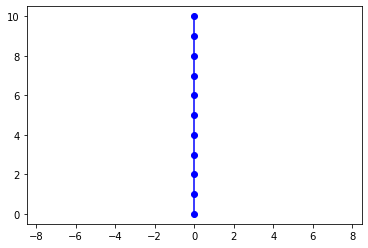

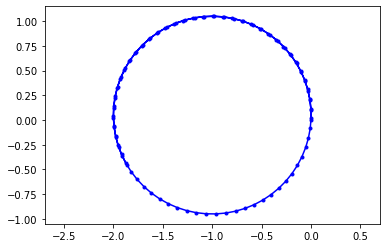

In [ ]:
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0], straight_trajectory[:,1],'o-b')

### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circular_trajectory[:,0], circular_trajectory[:,1],'.-b')
plt.show()

### Simulate Unicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\omega$. To make it even simpler, $\omega$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\omega = \omega_c$ when turning

This leaves only 2 questions to be answered
* What should be $v_c$ and $\omega_c$?
* When should $\omega$ change from 0 and back?

In [ ]:
vc = 1 #m/s
wc = np.pi/6 #rad/s

#calculate time taken to finish a quarter turn (pi/4)
t_turn = int((np.pi/4)/wc)

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

t_straight1, t_straight2, t_straight3 = int(10/vc), int(5/vc), int(8/ vc)

all_w = [0]*t_straight1 + [wc]*t_turn + \
        [0]*t_straight2 + [wc]*t_turn + \
        [0]*t_straight3 + [-wc]*t_turn

all_v = vc*np.ones_like(all_w)

Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_w

In [ ]:
def get_open_loop_commands(route, vc_slow=0.5,vc_fast=1, wc=np.pi/12, dt=1.0):
    all_w = []
    omegas = {'straight': 0, 'left': wc, 'right': -wc}
    for manoeuvre, command in route:
      u = np.ceil(command/vc).astype('int')
      v = np.ceil(np.deg2rad(command)/wc).astype('int')
      t_cmd = u if manoeuvre == 'straight' else v
      all_w += [omegas[manoeuvre]]*t_cmd
    all_v = vc*np.ones_like(all_w)
    return all_v, all_w


### Unit test your function with the following inputs

+ [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
+ $v_c = 1$
+ $w_c = \pi/12$

In [ ]:
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])


In [ ]:
robot_trajectory = []
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])
pose = (0, 0, np.pi/2)
robot_trajectory.append(pose)
for v, w in zip(all_v, all_w):
    #instruction to take v, w and compute new pose 
    pose= unicycle_model(pose,v,w)
    # store new pose
    robot_trajectory.append(pose)
robot_trajectory=np.array(robot_trajectory)
   

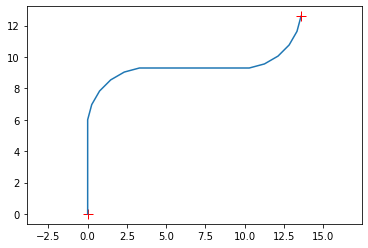

In [ ]:
# plot robot trajectory
plt.figure()
#plt.grid()
#plt.plot( )

#show first and last robot positions with + markers
xi, yi, _ = robot_trajectory[0]
xf, yf, _ = robot_trajectory[-1]
plt.axes().set_aspect("equal","datalim")
plt.plot(xi, yi, 'r+', ms=10)
plt.plot(robot_trajectory[:,0],robot_trajectory[:,1])
plt.plot(xf,yf,'+r',ms=10)


### Improved capabilities!

+ Slow the robot while turning ($v_c$ for turn and straight needed)

+ How to accommodate a sampling time < 1.0s (hint: think of sampling instances instead of time)

In [ ]:
def get_open_loop_commands_new(route,vc_turn=0.5,vc_straight=1,wc=np.pi/12,dt=1):
  all_w=[]
  all_v=[]
  index_rot={"straight": 0, "right": -wc, "left": wc,}
  index_trans={"straight": vc_straight, "right": vc_turn, "left": vc_turn,} 
  for manoeuvre,command in route:
    if manoeuvre=="straight":
       t_cmnd = np.ceil(command/vc_straight).astype('int')
    else:
       t_cmnd = np.ceil(np.deg2rad(command)/wc).astype('int')
    #we multiply by (1/dt) to increase the no of instances proportional to sampling time
    all_v+=[index_trans[manoeuvre]]*t_cmnd*int(1/dt) 
    all_w+=[index_rot[manoeuvre]]*t_cmnd*int(1/dt)
  return all_v,all_w



In [ ]:
robot_trajectory = []
#decreasing dt results in much more realistic behaviour(as sampling time decreases) and hence insures the smoothness of the curve.
dt=0.01        
#changing vc_turn dictates the change in curvature of the turn.Decreasing vc_turn results in sharper turning
vc_turn=0.2    #changing vc to 0.01 results in sharp turn 
all_v, all_w = get_open_loop_commands_new([("straight", 5), ("right", 90), ("straight", 6), ("left", 85),],vc_turn=vc_turn,dt=dt)
pose = (0, 0, np.pi/2)
robot_trajectory.append(pose)
for v, w in zip(all_v, all_w):
    #instruction to take v, w and compute new pose 
    pose= unicycle_model(pose,v,w,dt)
    # store new pose
    robot_trajectory.append(pose)
robot_trajectory=np.array(robot_trajectory)
   

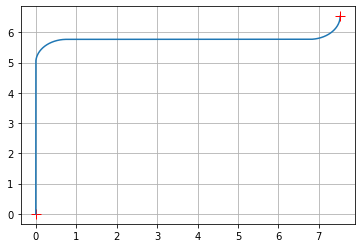

In [ ]:
# plot robot trajectory
plt.figure()
plt.grid()
plt.plot( )

#show first and last robot positions with + markers
xi, yi, _ = robot_trajectory[0]
xf, yf, _ = robot_trajectory[-1]
#plt.axes().set_aspect("equal","datalim")
plt.plot(xi, yi, 'r+', ms=10)
plt.plot(robot_trajectory[:,0],robot_trajectory[:,1])
plt.plot(xf, yf,'+r',ms=10)